Q1. What is Gradient Boosting Regression?

Ans. Gradient Boosting Regression is a machine learning technique that belongs to the family of ensemble learning methods. Specifically, it is a regression algorithm that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. The term "gradient" in Gradient Boosting refers to the technique's use of gradient descent optimization to minimize the loss function.

Here are the key components and concepts associated with Gradient Boosting Regression:

1. **Weak Learners (Decision Trees):**
   - Gradient Boosting Regression uses decision trees as weak learners. These are often shallow trees with a limited number of nodes or depth, referred to as "stumps" when they are very shallow.

2. **Sequential Training:**
   - The algorithm builds a series of decision trees sequentially. Each tree is trained to correct the errors or residuals of the combined predictions of the previously trained trees.

3. **Loss Function:**
   - The optimization objective is to minimize a loss function, which measures the difference between the predicted values and the actual target values. Common loss functions for regression tasks include mean squared error (MSE) and mean absolute error (MAE).

4. **Gradient Descent:**
   - Gradient Boosting Regression uses gradient descent to minimize the loss function. In each iteration, the algorithm calculates the gradient of the loss function with respect to the model's predictions, and it adjusts the model's parameters (tree predictions) in the direction that reduces the loss.

5. **Residuals and Learning Rate:**
   - Each weak learner is trained to predict the residuals (errors) of the combined model. The learning rate parameter controls the step size in the gradient descent optimization, influencing the contribution of each tree to the final ensemble.

6. **Ensemble Combination:**
   - The predictions of all weak learners are combined to form the final ensemble prediction. The ensemble is essentially the sum of the predictions from all the trees, each multiplied by a learning rate and added sequentially.

7. **Regularization:**
   - Gradient Boosting Regression often incorporates regularization techniques, such as tree pruning or shrinkage, to prevent overfitting and improve the model's generalization to new data.

8. **Hyperparameters:**
   - Gradient Boosting Regression has various hyperparameters that can be tuned to optimize its performance. These include the learning rate, the depth of the trees, the number of trees, and regularization parameters.



Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

Ans.Implementing a gradient boosting algorithm from scratch involves constructing decision trees and implementing the gradient descent optimization process. Below is a simplified example of a gradient boosting algorithm for regression using Python and NumPy. Please note that this implementation is basic and lacks some of the optimizations present in more advanced libraries.



C:\Users\jatin\AppData\Local\Temp\ipykernel_23104\1381984190.py:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)


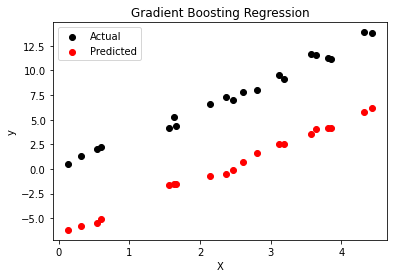

Mean Squared Error: 50.4891
R-squared: -2.1481


In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 5
y = 3 * X.squeeze() + np.random.randn(100) * 0.5

# Gradient Boosting Regression class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initialize with the mean of the target variable
        initial_prediction = np.mean(y)
        residuals = y - initial_prediction

        for _ in range(self.n_estimators):
            # Fit a weak learner (decision tree) to the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            # Update predictions based on the weak learner
            prediction = tree.predict(X)
            residuals -= self.learning_rate * prediction

            # Store the weak learner in the ensemble
            self.models.append(tree)

    def predict(self, X):
        # Combine predictions of all weak learners
        predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return predictions

# Split the data into training and testing sets
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Gradient Boosting Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


In this example, the GradientBoostingRegressor class is implemented with a basic decision tree as the weak learner. The algorithm is trained on a synthetic dataset, and the results are visualized using a scatter plot. Finally, mean squared error (MSE) and R-squared are calculated for evaluation.

Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters.

Ans.To experiment with different hyperparameters and optimize the performance of the model, you can use grid search or random search. Below is an example using grid search with scikit-learn's GridSearchCV to find the best hyperparameters for the Gradient Boosting Regression model:

In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 5
y = 3 * X.squeeze() + np.random.randn(100) * 0.5

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Use grid search with mean squared error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring=mse_scorer)

# Split the data into training and testing sets
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 0.3531
R-squared: 0.9780


In this example, the GridSearchCV is used to perform a grid search over different combinations of hyperparameters (number of trees, learning rate, and max depth) using 5-fold cross-validation. The best hyperparameters and the corresponding best model are then used to make predictions on the test set, and the performance of the best model is evaluated.

Q4. What is a weak learner in Gradient Boosting?

Ans. In the context of Gradient Boosting, a weak learner refers to a model that performs slightly better than random chance on a given task. Specifically, it is a model that, when used as a component in an ensemble, contributes to the overall predictive power of the model, even though it may have limitations and be relatively simple.

Here are some characteristics of weak learners in the context of Gradient Boosting:

1. **Limited Complexity:**
   - Weak learners are intentionally kept simple and have limited complexity. They are often shallow decision trees (stumps) with few nodes or levels.

2. **Low Predictive Power:**
   - Individually, weak learners may have low predictive power and may not perform well on the task compared to more complex models. However, they are designed to perform slightly better than random chance.

3. **Focus on Residuals:**
   - In the context of Gradient Boosting, weak learners are trained to predict the residuals (errors) of the combined model. Each weak learner corrects the errors of the ensemble formed by the previously trained weak learners.

4. **Sequential Building:**
   - Weak learners are added to the ensemble sequentially, with each new learner addressing the residuals left by the combined predictions of the existing ensemble. This sequential building process helps improve the model's performance iteratively.

5. **Emphasis on Challenging Cases:**
   - Weak learners are particularly useful for addressing challenging cases or instances that are difficult to classify correctly. They are focused on learning from the instances where the model currently performs poorly.



Q5. What is the intuition behind the Gradient Boosting algorithm?

Ans.The intuition behind the Gradient Boosting algorithm lies in building a strong predictive model by combining the strengths of multiple weak learners, each correcting the errors of the ensemble. Here's an intuitive explanation of how Gradient Boosting works:

1. **Sequential Improvement:**
   - Gradient Boosting builds an ensemble of weak learners sequentially. Each weak learner is trained to correct the errors made by the combined predictions of the existing ensemble.

2. **Focus on Residuals:**
   - At each iteration, a weak learner is fit to the residuals (errors) of the current ensemble. The residuals represent the difference between the actual target values and the predictions made by the current ensemble.

3. **Gradient Descent Optimization:**
   - Gradient Boosting uses a form of gradient descent optimization to minimize the loss function. The optimization process involves adjusting the parameters of the weak learners in the direction that reduces the errors. This is done by calculating the negative gradient of the loss function with respect to the model's predictions.

4. **Combining Weak Learners:**
   - The predictions of all weak learners are combined to form the ensemble prediction. Each weak learner contributes to the final prediction by an amount proportional to its learning rate. The learning rate controls the step size in the gradient descent optimization.

5. **Emphasis on Challenging Cases:**
   - Weak learners are particularly effective in handling challenging instances or cases where the model performs poorly. The algorithm adapts to the complexity of the data by giving more emphasis to instances with larger residuals.

6. **Regularization and Shrinkage:**
   - Gradient Boosting often incorporates regularization techniques, such as tree pruning or shrinkage, to prevent overfitting. Regularization helps ensure that the model generalizes well to new, unseen data.



Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Ans.The Gradient Boosting algorithm builds an ensemble of weak learners sequentially, with each weak learner added to the ensemble correcting the errors or residuals of the existing ensemble. The process involves the following steps:

1. **Initialize Ensemble:**
   - The process begins by initializing the ensemble with a simple model, often the mean (for regression tasks) or the log-odds (for binary classification tasks) of the target variable. This initial prediction serves as a starting point for the optimization process.

2. **Calculate Residuals:**
   - Calculate the residuals, which represent the difference between the actual target values and the predictions made by the current ensemble. These residuals are the errors that need to be corrected.

3. **Train a Weak Learner:**
   - Fit a weak learner (e.g., a shallow decision tree) to the residuals. The weak learner is trained to predict the residuals left by the current ensemble. The goal is to improve the predictions for instances where the model currently performs poorly.

4. **Update Ensemble Predictions:**
   - Update the ensemble predictions by combining the predictions of the current weak learner with the predictions of the existing ensemble. The combination is performed with a learning rate, which controls the step size in the optimization process. The learning rate is a hyperparameter that influences the contribution of each weak learner to the final prediction.

5. **Repeat Iteratively:**
   - Repeat steps 2-4 iteratively. In each iteration, a new weak learner is trained to predict the residuals of the combined model. The predictions of all weak learners are combined to form the ensemble prediction.

6. **Stopping Criteria:**
   - The process continues for a predefined number of iterations or until a stopping criterion is met. Stopping criteria may include reaching a specified number of weak learners, achieving a satisfactory level of performance, or when further iterations do not significantly improve the model.



Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

Ans.Constructing the mathematical intuition behind the Gradient Boosting algorithm involves understanding the optimization process, the role of residuals, and the update formula for the ensemble predictions. Below are the key steps involved in developing the mathematical intuition of Gradient Boosting:

1. **Initialize Ensemble:**
   - Start with the initial prediction, often the mean (for regression) or log-odds (for binary classification) of the target variable. This serves as the starting point for optimization.

2. **Compute Residuals:**
   - Calculate the residuals, which are the differences between the actual target values and the current predictions of the ensemble. The residuals represent the errors that need to be corrected.

3. **Train Weak Learner:**
   - Fit a weak learner (e.g., a shallow decision tree) to the residuals. The weak learner is trained to predict the residuals left by the current ensemble.

4. **Compute Learning Rate-Weighted Prediction:**
   - Multiply the predictions of the weak learner by a learning rate (α). The learning rate controls the step size in the optimization process. The weighted prediction is then added to the current ensemble predictions.

   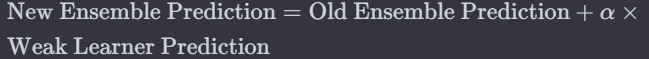

5. **Update Residuals:**
   - Update the residuals by subtracting the predictions made by the weak learner. The new residuals represent the errors that remain after incorporating the information from the weak learner.

  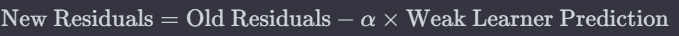

6. **Repeat Iteratively:**
   - Repeat steps 2-5 iteratively. In each iteration, a new weak learner is trained to predict the current residuals. The predictions of all weak learners are combined with the existing ensemble predictions.

7. **Combining Predictions:**
   - The final prediction is the sum of the weighted predictions from all weak learners. The weights are determined by the learning rate and the predictions of the weak learners.

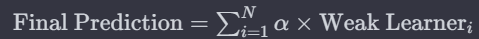

8. **Regularization (Optional):**
   - Gradient Boosting often includes regularization techniques to prevent overfitting. Regularization may involve constraints on the complexity of the weak learners, such as tree pruning or shrinkage.

9. **Stopping Criteria:**
   - The process continues for a predefined number of iterations or until a stopping criterion is met. Stopping criteria may include reaching a specified number of weak learners, achieving a satisfactory level of performance, or when further iterations do not significantly improve the model.

10. **Optimization Objective:**
   - The objective of the optimization process is to minimize a loss function. Common loss functions include mean squared error (MSE) for regression and deviance (negative log-likelihood) for classification.
